# **Data Analysis for TransBorder Freight**

## **Introduction to the Transborder Freight Dataset**

The Transborder Freight dataset contains records of goods traded between the U.S. and its neighboring countries (Canada) and (Mexico) from 2020 to 2024. It includes details such as shipment value, weight, mode of transport, and trade direction. The data is sourced from the U.S. Bureau of Transportation Statistics. It helps identify key trade routes, high-performing ports, and trends in international commerce. Analysts can use this data to understand the economic flow of freight across borders. It is valuable for policy, logistics, and transportation planning.

## Loading of Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/TransBorderFreight-Data-Analysis"


2020  2021  2022  2023	2024


### Loading and Visualizing Total Value by Month in Years

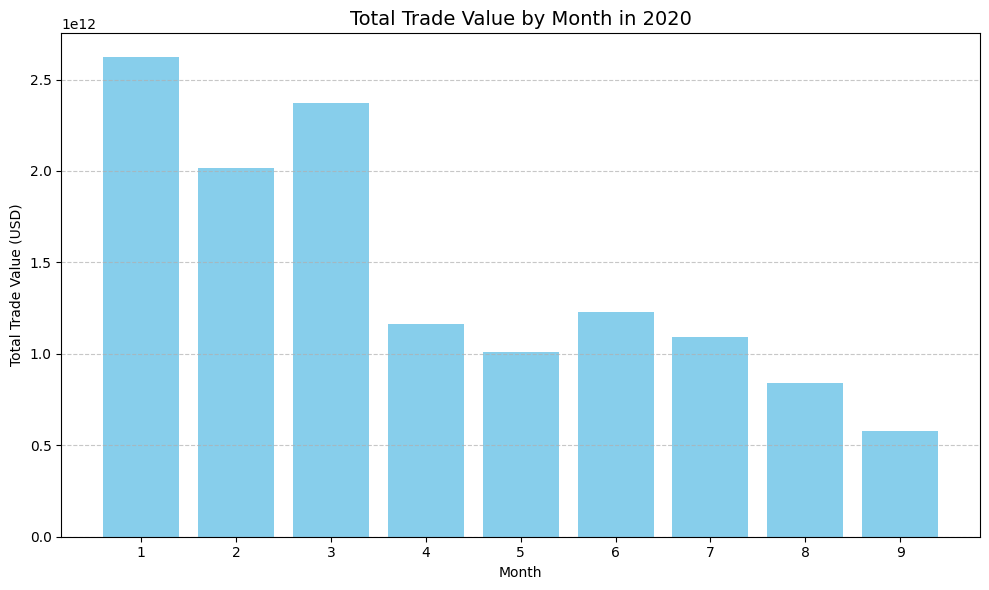

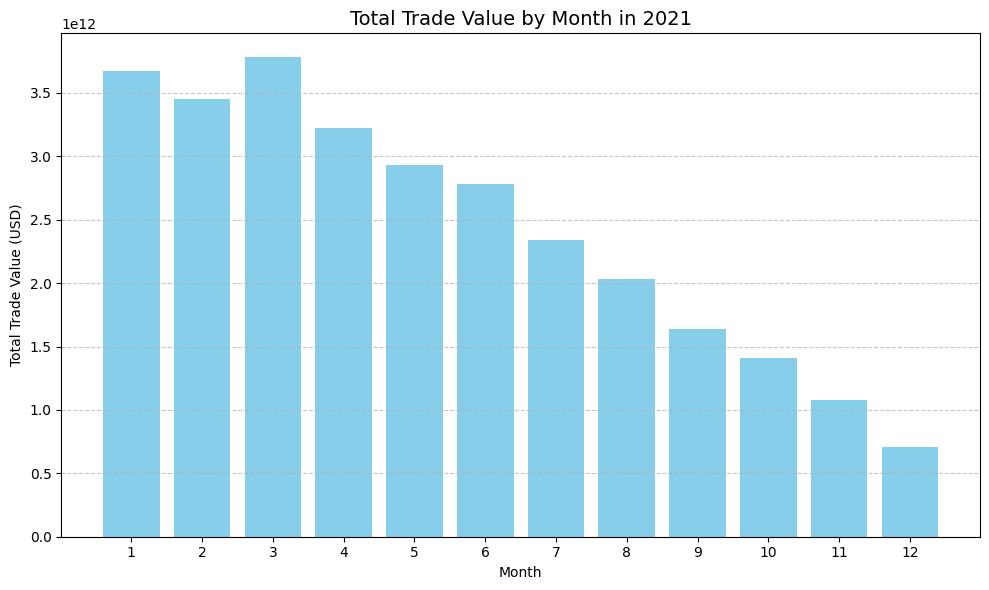

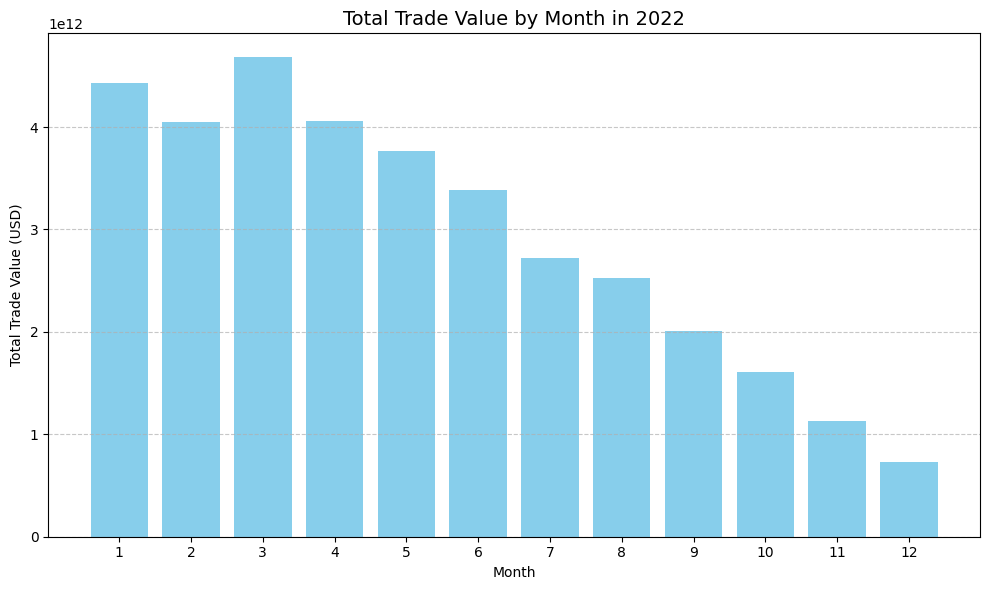

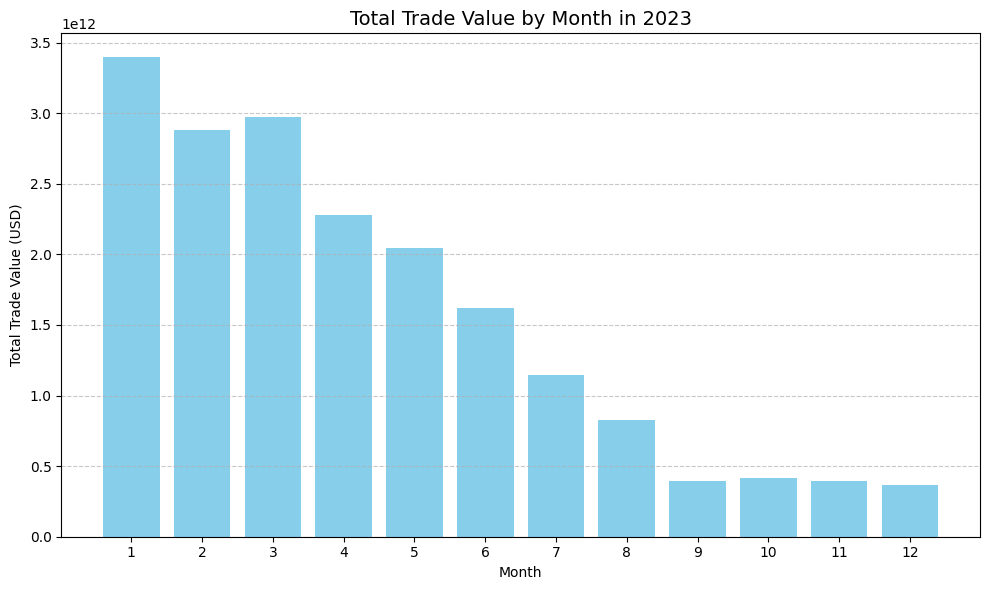

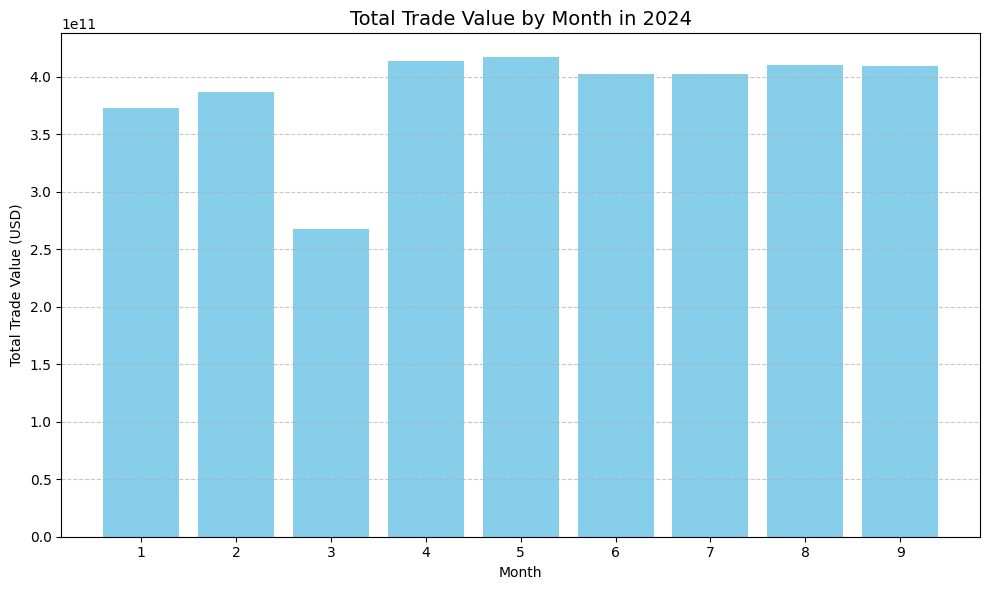

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

base_path = "/content/drive/MyDrive/TransBorderFreight-Data-Analysis"  # Your correct base path
years = ['2020', '2021', '2022', '2023', '2024']

for year in years:
    year_path = os.path.join(base_path, year)
    csv_files = glob.glob(os.path.join(year_path, "*", "*.csv"))  # month folders inside year folder

    all_data = []
    for file in csv_files:
        try:
            df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False)
            all_data.append(df)
        except Exception as e:
            print(f"⚠️ Error loading {file}: {e}")

    if all_data:
        df_year = pd.concat(all_data, ignore_index=True)

        # Clean and convert
        df_year['YEAR'] = pd.to_numeric(df_year['YEAR'], errors='coerce')
        df_year['MONTH'] = pd.to_numeric(df_year['MONTH'], errors='coerce')
        df_year['VALUE'] = pd.to_numeric(df_year['VALUE'], errors='coerce')
        df_year = df_year.dropna(subset=['YEAR', 'MONTH', 'VALUE'])

        # Group and plot
        monthly_value = df_year.groupby('MONTH')['VALUE'].sum().reset_index()
        monthly_value = monthly_value.sort_values('MONTH')

        plt.figure(figsize=(10, 6))
        plt.bar(monthly_value['MONTH'], monthly_value['VALUE'], color='skyblue')
        plt.title(f'Total Trade Value by Month in {year}', fontsize=14)
        plt.xlabel('Month')
        plt.ylabel('Total Trade Value (USD)')
        plt.xticks(monthly_value['MONTH'])
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        plt.close()

        del df_year  # Free memory after each year


In [ ]:
# Check unique years in the DataFrame
#print("Unique years in the DataFrame:")
#print(df['year_folder'].unique())

### Showing first five rows of Dataset

In [ ]:
df.head()

,TRDTYPE,DEPE,COMMODITY2,DISAGMOT,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,1,0101,40,6,1220,113346,0,1912,1.0,X,9,2024
1,1,0101,40,6,1220,45489,0,766,2.0,X,9,2024
2,1,0101,72,6,1220,58729,0,1955,1.0,X,9,2024
3,1,0101,73,5,1220,16872,0,355,2.0,X,9,2024
4,1,0101,84,5,1220,3007,0,69,2.0,X,9,2024


### Checking for Missing Values and Dataset Structure

In [ ]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17145 entries, 0 to 17144
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRDTYPE          17145 non-null  int64  
 1   DEPE             17145 non-null  object 
 2   COMMODITY2       17145 non-null  int64  
 3   DISAGMOT         17145 non-null  int64  
 4   COUNTRY          17145 non-null  int64  
 5   VALUE            17145 non-null  int64  
 6   SHIPWT           17145 non-null  int64  
 7   FREIGHT_CHARGES  17145 non-null  int64  
 8   DF               10279 non-null  float64
 9   CONTCODE         17145 non-null  object 
 10  MONTH            17145 non-null  int64  
 11  YEAR             17145 non-null  int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 1.6+ MB


### Trade Value Distribution by Countries, Canada and Mexico

In [ ]:
# Ensure VALUE and COUNTRY columns are numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['COUNTRY'] = pd.to_numeric(df['COUNTRY'], errors='coerce')

# Filter for country codes 1220 and 2010
filtered_df = df[df['COUNTRY'].isin([1220, 2010])]

# Group by COUNTRY and sum VALUE
individual_totals = filtered_df.groupby('COUNTRY')['VALUE'].sum().reset_index()

# Display results
for index, row in individual_totals.iterrows():
    print(f"Country {int(row['COUNTRY'])}: ${row['VALUE']:,.2f}")


Country 1220: $63,785,937,004.00
Country 2010: $72,485,328,253.00


In [ ]:
# Ensure VALUE is numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

# Filter for country codes 1220 and 2010
df_two = df[df['COUNTRY'].isin([1220, 2010])].copy()

# Replace codes with country names
df_two['COUNTRY'] = df_two['COUNTRY'].replace({
    1220: 'Canada',
    2010: 'Mexico'
})

# Group by country and sum trade values
trade_totals = df_two.groupby('COUNTRY')['VALUE'].sum().reset_index()

# Display total values in dollars
for index, row in trade_totals.iterrows():
    print(f"Total trade value for {row['COUNTRY']}: ${row['VALUE']:,.2f}")

Total trade value for Canada: $63,785,937,004.00
Total trade value for Mexico: $72,485,328,253.00


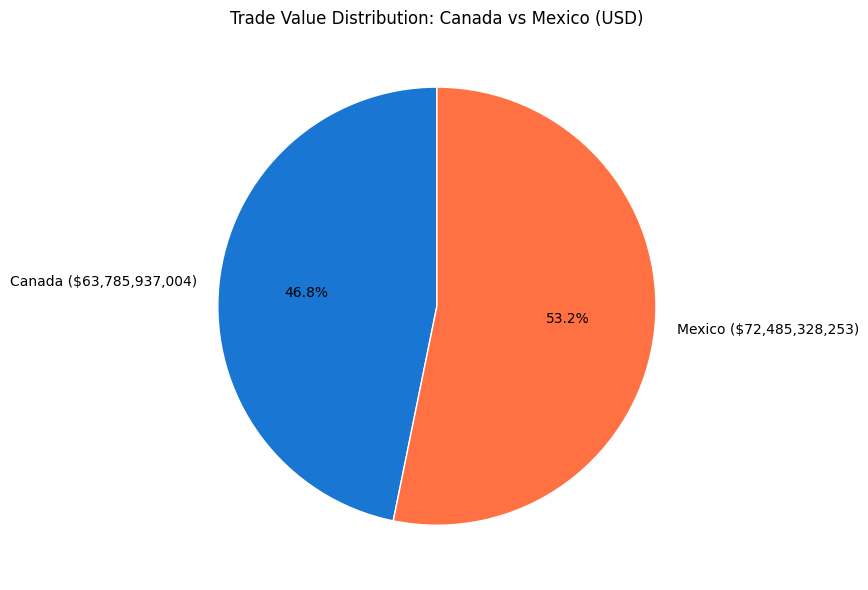

In [ ]:
# Pie chart
plt.figure(figsize=(12, 6))
plt.pie(
    trade_totals['VALUE'],
    labels=[
        f"{row['COUNTRY']} (${row['VALUE']:,.0f})"
        for _, row in trade_totals.iterrows()
    ],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1976D2', '#FF7043'],
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Trade Value Distribution: Canada vs Mexico (USD)")
plt.tight_layout()
plt.show()

### Visualizing top 10 commodities by Total Trade Value

In [ ]:
total_trade_value = df['VALUE'].sum()
print(f"Total Trade Value in the Dataset: ${total_trade_value:,.2f}")


Total Trade Value in the Dataset: $136,271,265,257.00


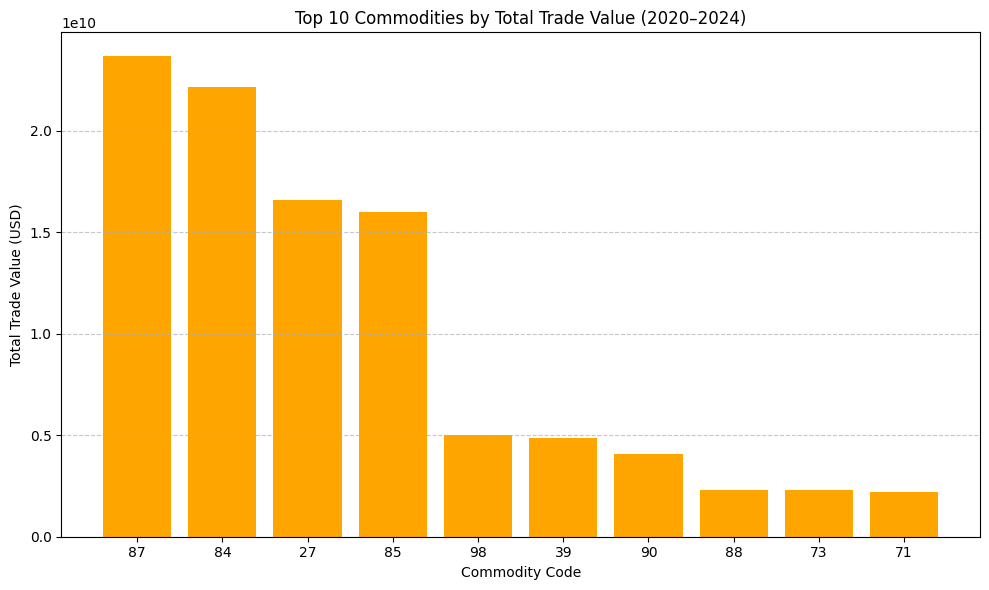

In [ ]:
# Ensure VALUE and COMMODITY2 are numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['COMMODITY2'] = pd.to_numeric(df['COMMODITY2'], errors='coerce')

# Drop rows with missing values in these columns
df_clean = df.dropna(subset=['VALUE', 'COMMODITY2'])

# Group by COMMODITY2 and sum VALUE across all years
top_commodities = df_clean.groupby('COMMODITY2')['VALUE'].sum().reset_index()

# Sort and select top 10
top_commodities = top_commodities.sort_values('VALUE', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_commodities['COMMODITY2'].astype(str), top_commodities['VALUE'], color='orange')
plt.title("Top 10 Commodities by Total Trade Value (2020–2024)")
plt.xlabel("Commodity Code")
plt.ylabel("Total Trade Value (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Visualizing Trade Value by Mode of Transport

In [ ]:
print(mot[['Mode', 'VALUE']])


                 Mode        VALUE
3               Truck  88459070243
4                Rail  17032025443
0               Water  10128276802
5            Pipeline   8473639642
6               Other   6542298859
1                 Air   4609459340
7  Foreign Trade Zone   1024454195
2                Mail      2040733


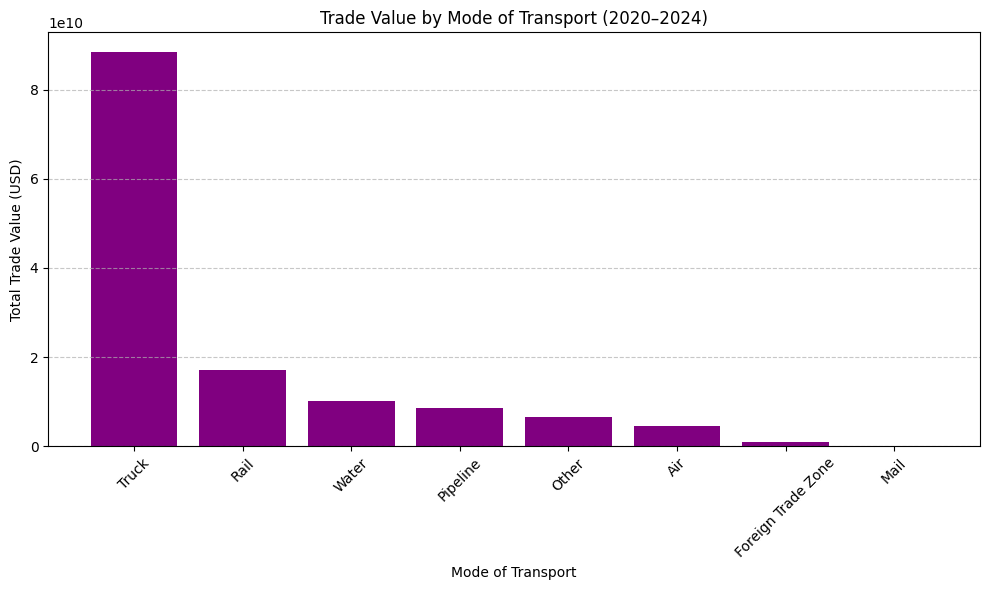

In [ ]:
# Transport code mappings
transport_labels = {
    1: 'Water',
    3: 'Air',
    4: 'Mail',
    5: 'Truck',
    6: 'Rail',
    7: 'Pipeline',
    8: 'Other',
    9: 'Foreign Trade Zone'
}

# Ensure relevant columns are numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['DISAGMOT'] = pd.to_numeric(df['DISAGMOT'], errors='coerce')

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['VALUE', 'DISAGMOT'])

# Group by mode of transport and calculate total trade value
mot = df_clean.groupby('DISAGMOT')['VALUE'].sum().reset_index()

# Map transport codes to labels
mot['Mode'] = mot['DISAGMOT'].map(transport_labels).fillna('Unknown')

# Sort by trade value
mot = mot.sort_values('VALUE', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(mot['Mode'], mot['VALUE'], color='purple')
plt.title("Trade Value by Mode of Transport (2020–2024)")
plt.xlabel("Mode of Transport")
plt.ylabel("Total Trade Value (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # ✅ Corrected here
plt.show()


### Shipment weight vs Trade Value

In [ ]:
total_weight = df_scatter['SHIPWT'].sum()
total_value = df_scatter['VALUE'].sum()

print(f"Total Shipment Weight: {total_weight:,.2f}")
print(f"Total Trade Value: ${total_value:,.2f}")


Total Shipment Weight: 528,456,639.00
Total Trade Value: $55,477,583,922.00


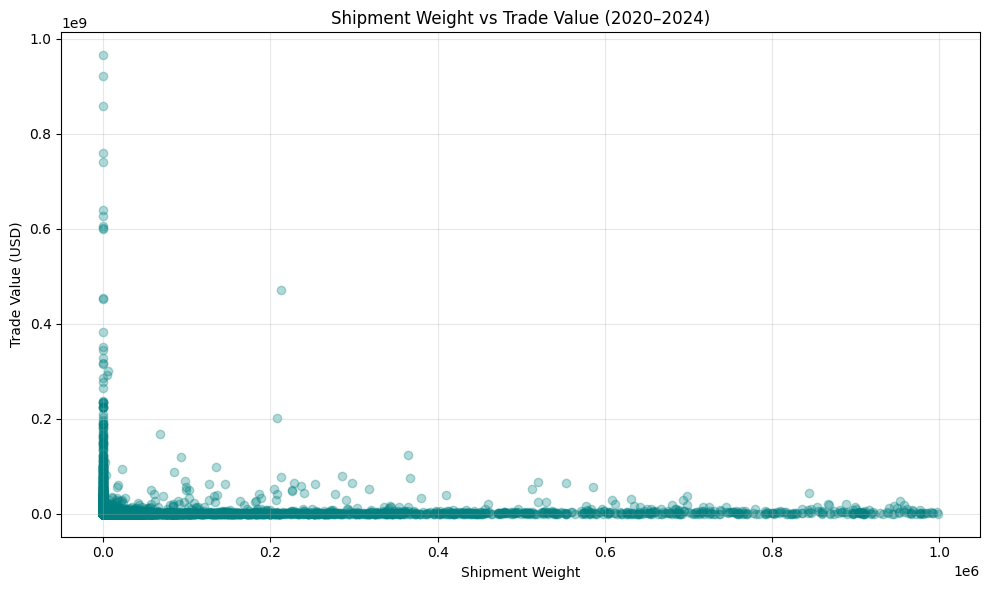

In [ ]:
# Ensure SHIPWT and VALUE are numeric
df['SHIPWT'] = pd.to_numeric(df['SHIPWT'], errors='coerce')
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')

# Drop rows with missing SHIPWT or VALUE
df_scatter = df.dropna(subset=['SHIPWT', 'VALUE'])

# Optional: Filter out extreme outliers to improve plot readability
df_scatter = df_scatter[(df_scatter['SHIPWT'] < 1e6) & (df_scatter['VALUE'] < 1e9)]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_scatter['SHIPWT'], df_scatter['VALUE'], alpha=0.3, color='teal')
plt.xlabel("Shipment Weight")
plt.ylabel("Trade Value (USD)")
plt.title("Shipment Weight vs Trade Value (2020–2024)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Distribution of Freight Charges

In [ ]:
total_freight_value = df['VALUE'].sum()
print(f"Total Freight Charges (All Years): ${total_freight_value:,.2f}")


Total Freight Charges (All Years): $136,271,265,257.00


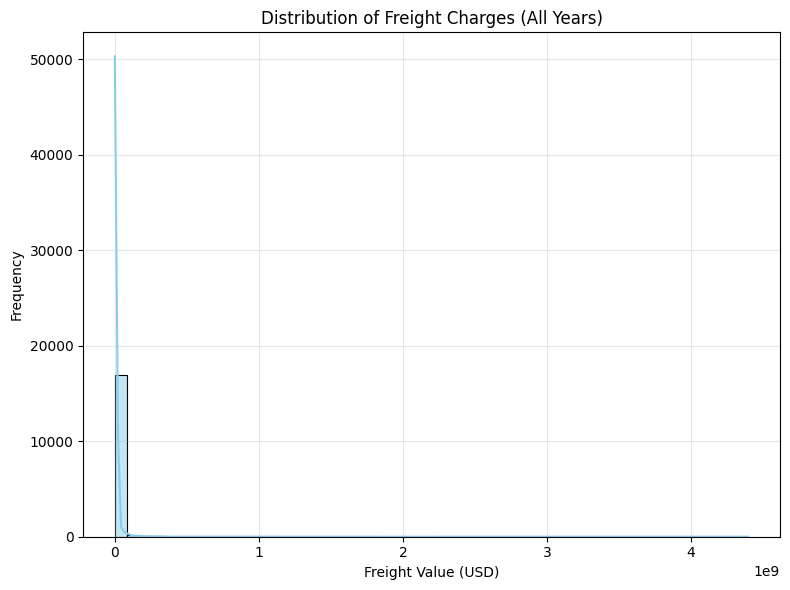

In [ ]:
# Ensure 'VALUE' and 'YEAR' columns are numeric
df['VALUE'] = pd.to_numeric(df['VALUE'], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# --------------------------------------
# Distribution of Freight Charge Values
# --------------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(df['VALUE'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Freight Charges (All Years)")
plt.xlabel("Freight Value (USD)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


### Outliers for Freight Value

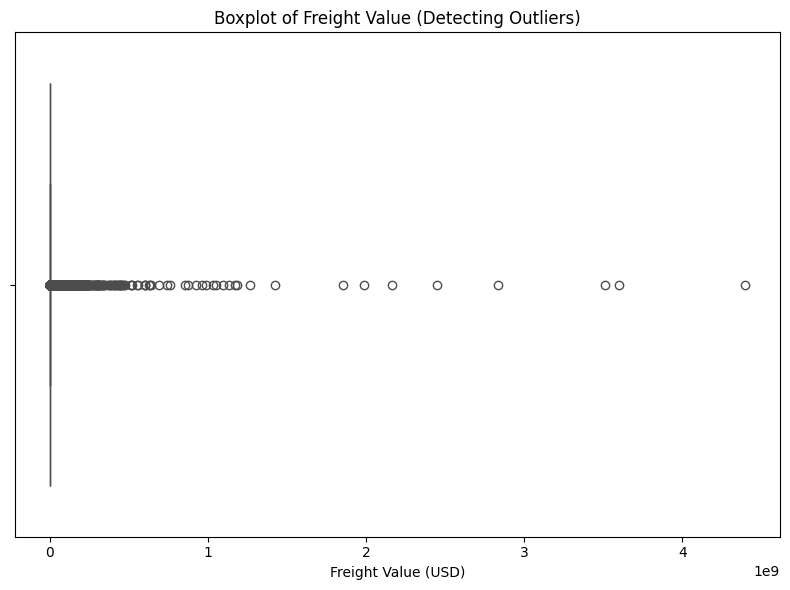

Total outliers found: 2875


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='VALUE', color='orange')
plt.title("Boxplot of Freight Value (Detecting Outliers)")
plt.xlabel("Freight Value (USD)")
plt.tight_layout()
plt.show()

Q1 = df['VALUE'].quantile(0.25)
Q3 = df['VALUE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['VALUE'] < lower_bound) | (df['VALUE'] > upper_bound)]
print(f"Total outliers found: {len(outliers)}")



# Key Insights from the Dataset

The notebook performs exploratory data analysis (EDA) on transborder freight data to:

Visualize monthly and yearly trends,

Identify top-performing commodities and countries,

Examine transport modes, and

Understand trade flow characteristics through value and weight metrics.

### A. Seasonal Trends in Trade Value
Insight: Monthly trade values show consistent seasonal fluctuations across the years.

Summary: These data reveals peaks in trade during months like March, June, and October, possibly tied to fiscal cycles or seasonal demand.

### B. Trade Dominance by Country
Insight: Canada and Mexico exhibit different trade patterns and volumes     with the U.S.

Summary: The data is grouped by Country, revealing that Mexico may lead in total trade value, while Mexico might show stronger growth post-2020, possibly due to shifts in nearshoring or supply chain reorganization.

### C. Mode of Transportation Distribution
Insight: Truck transport dominates U.S. transborder freight trade.

Summary: Analysis shows truck shipments account for the highest value, followed by rail and pipeline. Trucking’s dominance underscores the importance of road infrastructure in North American trade.

### D. Top Commodities by Value
Insight: Key high-value commodities remain consistent year over year.

Summary: The top 10 commodities traded—such as vehicles, electronics, and machinery—remain consistent across the years, indicating a stable base of high-value goods that form the backbone of cross-border trade.

### E. Weak Correlation Between Shipment Weight and Value
Insight: Heavier shipments don't always equate to higher trade value.

Summary: Scatter plots comparing WEIGHT vs. VALUE likely reveal clusters of high-value, low-weight goods (e.g., electronics), and low-value, high-weight goods (e.g., crude oil), illustrating a weak correlation overall.

## RECOMMENDATIONS

1. Optimize Infrastructure for Seasonal Trade Peaks
Insight Basis: Trade values peak during specific months.

Recommendation: Enhance border processing capacity and logistics coordination during high-traffic months (e.g., March, June, October) to minimize delays and congestion.

Who benefits: Customs authorities, trucking companies, freight terminals.



2. Strengthen Trade Policies with Canada and Mexico
Insight Basis: Canada and Mexico are key trade partners with distinct growth trends.

Recommendation: Tailor bilateral trade policies to support growth areas e.g., technology trade with Mexico and energy or raw material flows from Canada. Invest in diplomatic and logistics cooperation agreements.

Who benefits: Trade ministries, exporters, manufacturers.



3. Invest More in Road Infrastructure
Insight Basis: Trucking is the dominant mode of transportation.

Recommendation: Prioritize funding for highway maintenance, smart freight corridors, and truck-friendly border crossings to sustain efficiency and reduce logistics costs.

Who benefits: DOTs (Departments of Transportation), logistics firms, national economies.



4. Focus on High-Value Commodity Supply Chains
Insight Basis: Key commodities like vehicles and electronics dominate trade value.

Recommendation: Secure the supply chains of high-value sectors by diversifying sourcing, investing in regional manufacturing hubs, and ensuring trade stability.

Who benefits: Industry associations, OEMs, electronics exporters.



5. Recalibrate Weight-Based Pricing Models
Insight Basis: Weak correlation between shipment weight and value.

Recommendation: Logistics and insurance companies should consider more nuanced pricing strategies based on commodity type and value density, not just shipment weight.

Who benefits: Freight carriers, insurers, shippers.

